In [90]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [44]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [5]:
%config Completer.use_jedi = False

In [7]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

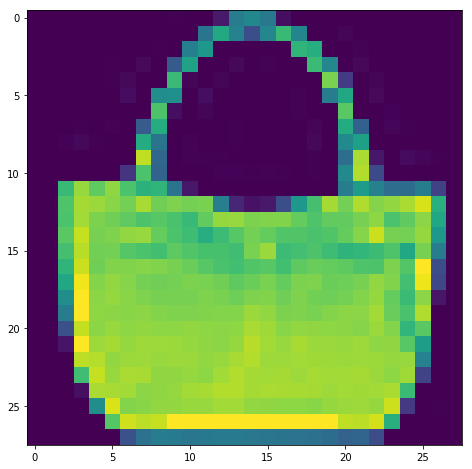

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(x_train[100])


In [9]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [28]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),input_shape=x_train.shape[1:], activation = 'relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(32,(3,3),input_shape=x_train.shape[1:], activation = 'relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Flatten())
    
    model.add(Dense(10, activation = 'softmax'))

    
    model.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    
    return model
    

In [29]:
model = build_model()
model.fit(x_train, y_train, batch_size = 64, epochs = 5, validation_data= (x_test,y_test))

Epoch 1/5
938/938 [==============================] - 36s 39ms/step - loss: 0.9749 - accuracy: 0.7876 - val_loss: 0.4769 - val_accuracy: 0.8287
Epoch 2/5
938/938 [==============================] - 36s 38ms/step - loss: 0.3872 - accuracy: 0.8640 - val_loss: 0.4088 - val_accuracy: 0.8543
Epoch 3/5
938/938 [==============================] - 37s 39ms/step - loss: 0.3434 - accuracy: 0.8775 - val_loss: 0.3749 - val_accuracy: 0.8658
Epoch 4/5
938/938 [==============================] - 36s 39ms/step - loss: 0.3131 - accuracy: 0.8869 - val_loss: 0.3837 - val_accuracy: 0.8642
Epoch 5/5
938/938 [==============================] - 36s 39ms/step - loss: 0.2918 - accuracy: 0.8938 - val_loss: 0.3577 - val_accuracy: 0.8723


In [30]:
import time

In [60]:
loc_dir = f'{int(time.time())}'

In [55]:
def build_model_with_hp(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('input_units',min_value=32,max_value=256, step= 32),
                     (3,3),input_shape=x_train.shape[1:], activation = 'relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))
    
    for i in range(hp.Int('n_layers',1,4)):
        model.add(Conv2D(hp.Int(f'conv_{i}_units',min_value=32,max_value=256, step= 32),
                         (3,3),input_shape=x_train.shape[1:], activation = 'relu'))

    
 
    model.add(Flatten())
    
    model.add(Dense(10, activation = 'softmax'))

    
    model.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    
    return model

In [61]:
tuner = RandomSearch(
        build_model_with_hp,
        objective = 'val_accuracy',
        max_trials = 1,
        executions_per_trial = 1,
        directory = loc_dir )

tuner.search(x_train,y_train,
            epochs=1,
            batch_size = 64,
            validation_data = (x_test,y_test))

186/938 [====>.........................] - ETA: 0s - loss: 17.0711 - accuracy: 0.0000e+0 - ETA: 45s - loss: 13.6109 - accuracy: 0.1016  - ETA: 1:03 - loss: 11.0426 - accuracy: 0.161 - ETA: 1:12 - loss: 9.4423 - accuracy: 0.199 - ETA: 1:15 - loss: 8.2464 - accuracy: 0.21 - ETA: 1:19 - loss: 7.2863 - accuracy: 0.22 - ETA: 1:21 - loss: 6.5548 - accuracy: 0.22 - ETA: 1:22 - loss: 6.0192 - accuracy: 0.24 - ETA: 1:25 - loss: 5.5895 - accuracy: 0.24 - ETA: 1:25 - loss: 5.2124 - accuracy: 0.24 - ETA: 1:27 - loss: 4.8838 - accuracy: 0.25 - ETA: 1:27 - loss: 4.6202 - accuracy: 0.25 - ETA: 1:27 - loss: 4.3718 - accuracy: 0.28 - ETA: 1:28 - loss: 4.2014 - accuracy: 0.28 - ETA: 1:28 - loss: 4.0338 - accuracy: 0.28 - ETA: 1:28 - loss: 3.8800 - accuracy: 0.29 - ETA: 1:28 - loss: 3.7506 - accuracy: 0.30 - ETA: 1:28 - loss: 3.6274 - accuracy: 0.30 - ETA: 1:28 - loss: 3.5050 - accuracy: 0.31 - ETA: 1:28 - loss: 3.4036 - accuracy: 0.32 - ETA: 1:28 - loss: 3.3098 - accuracy: 0.33 - ETA: 1:28 - loss: 3.217

372/938 [==========>...................] - ETA: 1:19 - loss: 1.0230 - accuracy: 0.68 - ETA: 1:19 - loss: 1.0204 - accuracy: 0.68 - ETA: 1:19 - loss: 1.0184 - accuracy: 0.68 - ETA: 1:19 - loss: 1.0158 - accuracy: 0.69 - ETA: 1:19 - loss: 1.0133 - accuracy: 0.69 - ETA: 1:19 - loss: 1.0100 - accuracy: 0.69 - ETA: 1:19 - loss: 1.0079 - accuracy: 0.69 - ETA: 1:19 - loss: 1.0055 - accuracy: 0.69 - ETA: 1:18 - loss: 1.0026 - accuracy: 0.69 - ETA: 1:18 - loss: 1.0006 - accuracy: 0.69 - ETA: 1:18 - loss: 0.9982 - accuracy: 0.69 - ETA: 1:18 - loss: 0.9955 - accuracy: 0.69 - ETA: 1:18 - loss: 0.9931 - accuracy: 0.69 - ETA: 1:18 - loss: 0.9902 - accuracy: 0.69 - ETA: 1:18 - loss: 0.9871 - accuracy: 0.69 - ETA: 1:18 - loss: 0.9851 - accuracy: 0.69 - ETA: 1:18 - loss: 0.9828 - accuracy: 0.70 - ETA: 1:18 - loss: 0.9806 - accuracy: 0.70 - ETA: 1:18 - loss: 0.9778 - accuracy: 0.70 - ETA: 1:17 - loss: 0.9749 - accuracy: 0.70 - ETA: 1:17 - loss: 0.9726 - accuracy: 0.70 - ETA: 1:17 - loss: 0.9706 - accura

558/938 [================>.............] - ETA: 1:00 - loss: 0.7776 - accuracy: 0.75 - ETA: 1:00 - loss: 0.7771 - accuracy: 0.75 - ETA: 1:00 - loss: 0.7759 - accuracy: 0.75 - ETA: 1:00 - loss: 0.7750 - accuracy: 0.75 - ETA: 1:00 - loss: 0.7741 - accuracy: 0.75 - ETA: 1:00 - loss: 0.7731 - accuracy: 0.75 - ETA: 1:00 - loss: 0.7724 - accuracy: 0.75 - ETA: 59s - loss: 0.7719 - accuracy: 0.7519 - ETA: 59s - loss: 0.7713 - accuracy: 0.751 - ETA: 59s - loss: 0.7702 - accuracy: 0.752 - ETA: 59s - loss: 0.7694 - accuracy: 0.752 - ETA: 59s - loss: 0.7692 - accuracy: 0.752 - ETA: 59s - loss: 0.7681 - accuracy: 0.752 - ETA: 59s - loss: 0.7675 - accuracy: 0.752 - ETA: 59s - loss: 0.7664 - accuracy: 0.753 - ETA: 59s - loss: 0.7654 - accuracy: 0.753 - ETA: 58s - loss: 0.7647 - accuracy: 0.753 - ETA: 58s - loss: 0.7636 - accuracy: 0.753 - ETA: 58s - loss: 0.7623 - accuracy: 0.754 - ETA: 58s - loss: 0.7612 - accuracy: 0.754 - ETA: 58s - loss: 0.7605 - accuracy: 0.754 - ETA: 58s - loss: 0.7599 - accura

744/938 [======================>.......] - ETA: 40s - loss: 0.6680 - accuracy: 0.780 - ETA: 40s - loss: 0.6676 - accuracy: 0.780 - ETA: 40s - loss: 0.6672 - accuracy: 0.780 - ETA: 40s - loss: 0.6667 - accuracy: 0.780 - ETA: 40s - loss: 0.6665 - accuracy: 0.780 - ETA: 40s - loss: 0.6663 - accuracy: 0.780 - ETA: 40s - loss: 0.6660 - accuracy: 0.780 - ETA: 40s - loss: 0.6655 - accuracy: 0.780 - ETA: 39s - loss: 0.6649 - accuracy: 0.780 - ETA: 39s - loss: 0.6644 - accuracy: 0.780 - ETA: 39s - loss: 0.6642 - accuracy: 0.780 - ETA: 39s - loss: 0.6637 - accuracy: 0.780 - ETA: 39s - loss: 0.6634 - accuracy: 0.781 - ETA: 39s - loss: 0.6631 - accuracy: 0.781 - ETA: 39s - loss: 0.6626 - accuracy: 0.781 - ETA: 39s - loss: 0.6626 - accuracy: 0.781 - ETA: 39s - loss: 0.6621 - accuracy: 0.781 - ETA: 38s - loss: 0.6616 - accuracy: 0.781 - ETA: 38s - loss: 0.6611 - accuracy: 0.781 - ETA: 38s - loss: 0.6605 - accuracy: 0.781 - ETA: 38s - loss: 0.6598 - accuracy: 0.781 - ETA: 38s - loss: 0.6596 - accurac

934/938 [============================>.] - ETA: 20s - loss: 0.6033 - accuracy: 0.798 - ETA: 20s - loss: 0.6032 - accuracy: 0.798 - ETA: 20s - loss: 0.6028 - accuracy: 0.798 - ETA: 20s - loss: 0.6026 - accuracy: 0.798 - ETA: 20s - loss: 0.6023 - accuracy: 0.798 - ETA: 20s - loss: 0.6019 - accuracy: 0.798 - ETA: 20s - loss: 0.6016 - accuracy: 0.798 - ETA: 20s - loss: 0.6014 - accuracy: 0.798 - ETA: 19s - loss: 0.6010 - accuracy: 0.798 - ETA: 19s - loss: 0.6010 - accuracy: 0.798 - ETA: 19s - loss: 0.6006 - accuracy: 0.798 - ETA: 19s - loss: 0.6003 - accuracy: 0.799 - ETA: 19s - loss: 0.5999 - accuracy: 0.799 - ETA: 19s - loss: 0.5995 - accuracy: 0.799 - ETA: 19s - loss: 0.5994 - accuracy: 0.799 - ETA: 19s - loss: 0.5991 - accuracy: 0.799 - ETA: 19s - loss: 0.5990 - accuracy: 0.799 - ETA: 18s - loss: 0.5988 - accuracy: 0.799 - ETA: 18s - loss: 0.5986 - accuracy: 0.799 - ETA: 18s - loss: 0.5983 - accuracy: 0.799 - ETA: 18s - loss: 0.5979 - accuracy: 0.799 - ETA: 18s - loss: 0.5975 - accurac

938/938 [==============================] - ETA: 0s - loss: 0.5574 - accuracy: 0.81 - ETA: 0s - loss: 0.5572 - accuracy: 0.81 - ETA: 0s - loss: 0.5569 - accuracy: 0.81 - ETA: 0s - loss: 0.5568 - accuracy: 0.81 - 106s 112ms/step - loss: 0.5568 - accuracy: 0.8115 - val_loss: 0.3865 - val_accuracy: 0.8675
[Trial complete]
[Trial summary]
 |-Trial ID: 0b3bc2017567893f0ddc171b83e1509a
 |-Score: 0.8675000071525574
 |-Best step: 0
 > Hyperparameters:
 |-conv_0_units: 128
 |-conv_1_units: 32
 |-input_units: 64
 |-n_layers: 2
INFO:tensorflow:Oracle triggered exit


In [62]:
tuner.results_summary()

[Results summary]
 |-Results in 1605197004\untitled_project
 |-Showing 10 best trials
 |-Objective(name='val_accuracy', direction='max')
[Trial summary]
 |-Trial ID: 0b3bc2017567893f0ddc171b83e1509a
 |-Score: 0.8675000071525574
 |-Best step: 0
 > Hyperparameters:
 |-conv_0_units: 128
 |-conv_1_units: 32
 |-input_units: 64
 |-n_layers: 2


In [67]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          36896     
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                25930     
Total params: 137,322
Trainable params: 137,322
Non-trainable params: 0
__________________________________________________

In [70]:
y_pred=tuner.get_best_models()[0].predict(x_test)

In [69]:
x_test.shape

(10000, 28, 28, 1)

In [71]:
y_pred.shape

(10000, 10)

In [73]:
y_test.shape

(10000,)

In [74]:
y_pred[0]

array([5.70286706e-04, 1.22055349e-06, 4.45961778e-05, 1.07840715e-04,
       1.78468440e-06, 4.97533893e-03, 6.23587985e-05, 5.87099269e-02,
       3.38005542e-04, 9.35188591e-01], dtype=float32)

In [78]:
import numpy as np
y_pred=np.argmax(y_pred, axis=-1)

In [79]:
y_pred.shape

(10000,)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
confusion_matrix(y_test,y_pred)

array([[809,   5,  19,  33,   5,   1, 109,   0,  19,   0],
       [  5, 972,   0,  14,   4,   0,   2,   0,   3,   0],
       [ 13,   0, 766,   6, 129,   1,  83,   0,   2,   0],
       [ 14,  33,  16, 832,  61,   0,  34,   0,  10,   0],
       [  0,   0,  58,  19, 852,   0,  65,   0,   6,   0],
       [  0,   0,   0,   0,   0, 965,   0,  17,   6,  12],
       [127,   6,  90,  34, 119,   1, 597,   0,  26,   0],
       [  0,   0,   0,   0,   0,  19,   0, 940,   1,  40],
       [  2,   0,   3,   0,   4,   3,  15,   1, 972,   0],
       [  0,   0,   0,   0,   0,   6,   0,  24,   0, 970]], dtype=int64)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.96      0.97      0.96      1000
           2       0.80      0.77      0.78      1000
           3       0.89      0.83      0.86      1000
           4       0.73      0.85      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.66      0.60      0.63      1000
           7       0.96      0.94      0.95      1000
           8       0.93      0.97      0.95      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# It is showing nice results with keras tuner. Almost efficiency in 95%.